In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
data_in = pd.read_csv('/Users/sergejvasiljev/Desktop/data.csv')
data = data_in.copy(deep=True)

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
len(data)

18207

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
data.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

## Гипотезы
### Самые дорогие футболисты нападающие
### Средний возраст игроков от 20 до 30 лет

Text(0.5, 1.0, 'Распределение игроков по позициям')

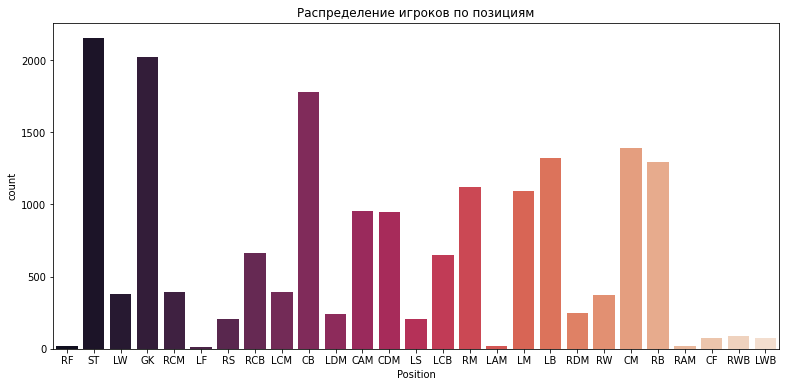

In [8]:
ax = sns.countplot(x="Position", data=data, palette="rocket")
ax.set_title("Распределение игроков по позициям")

## ТОП-3 по позициям:  
### Нападающие (ST)  
### Вратари (GK)  
### Центральный защитник (CB)  

## Посмотрим как потенциал зависит от возраста

Text(0.5, 1.0, 'График потенциала в зависимости от возраста')

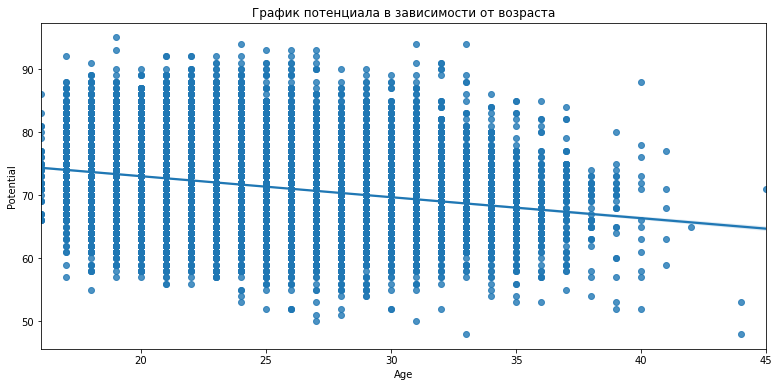

In [9]:
ax = sns.regplot(data = data,
    x='Age', 
    y='Potential', 
)
ax.set_title("График потенциала в зависимости от возраста")

Как видно из графика, что с увеличением возраста потенциал падает. Что вполне закономерно

## Посмотрим на топ 10 игроков с высоким потенциалом

In [10]:
data.sort_values("Potential", ascending=False)[['Name', "Age", "Value", 'Potential']].head(10)

,Name,Age,Value,Potential
25,K. Mbappé,19,€81M,95
0,L. Messi,31,€110.5M,94
15,P. Dybala,24,€89M,94
1,Cristiano Ronaldo,33,€77M,94
2,Neymar Jr,26,€118.5M,93
3,De Gea,27,€72M,93
9,J. Oblak,25,€68M,93
229,G. Donnarumma,19,€29M,93
1143,Vinícius Júnior,17,€17.5M,92
155,O. Dembélé,21,€40M,92


Из графика видно, что возраст ТОП-10 игроков с высоким потенциалом в среднем < 30 лет

## Посмотрим на распределение возраста среди игроков

Text(0.5, 1.0, 'Распределение возраста среди игроков')

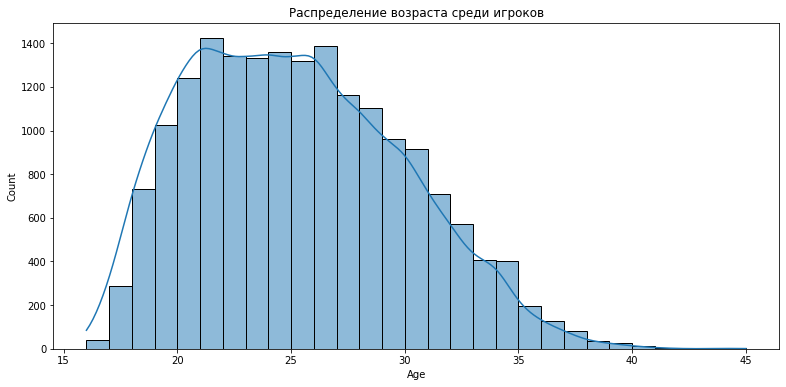

In [11]:
ax = sns.histplot(data = data, x = data.Age, binwidth=1, kde = True)
ax.set_title('Распределение возраста среди игроков')

Основная масса игроков находится в возрасте от 20 до 27 лет